In [1]:
from pymongo import MongoClient
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as stats
import numpy as np
import datetime as dt
from IPython.parallel import Client
import scipy.signal as signal

%matplotlib inline

In [2]:
client = MongoClient()
db = client.VentDyssynchrony_db
breath_data = db.BreathData_collection
patient_data = db.PatientData_collection
log_data = db.LogData_collection
vent_data = db.VentSettings_collection
RN_data = db.RNData_collection
RT_data = db.RTData_collection
Lab_data = db.LabData_collection


In [212]:
col_names=set()

RN_data_results = RN_data.find({},{'_id':0, 'patientID':1, 'RN_entry':1})
RT_data_results = RT_data.find()
Lab_data_results = Lab_data.find()

RNRT_df = pd.DataFrame.from_dict(list(RN_data_results))

# Get List of All Potential Column Names
names = RNRT_df['RN_entry'].apply(lambda x: set(list(x[0].keys()))).values.tolist()
for items in names:
    col_names.update(items)
col_names.remove('index')

# Flatten RN_entry into Individual Columns
for items in col_names:
        RNRT_df[items] = RNRT_df['RN_entry'].apply(lambda x: x[0][items] if items in x[0] else np.nan)

RNRT_df.drop('RN_entry', inplace=True, axis=1)
RNRT_df['DateTime'] = pd.to_datetime(RNRT_df['DateTime'])
RNRT_df.set_index('DateTime', inplace=True)

In [213]:
RNRT_df.columns

Index(['patientID', 'CPOT Vent', 'Pulse', 'TOF', 'SpO2', 'BP', 'Set RR', 'Resp', 'RASS', 'FiO2', 'A-line', 'Vent Mode', 'MAP', 'A-line MAP', 'CPOT Tot', 'CVP', 'Set Vt', 'Position'], dtype='object')

In [214]:
RNRT_df.head()

,patientID,CPOT Vent,Pulse,TOF,SpO2,BP,Set RR,Resp,RASS,FiO2,A-line,Vent Mode,MAP,A-line MAP,CPOT Tot,CVP,Set Vt,Position
DateTime,,,,,,,,,,,,,,,,,,
2014-04-21 03:14:00,P100,NaN,122,NaN,99,112/58,NaN,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-21 03:16:00,P100,NaN,NaN,NaN,NaN,Nurse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-21 03:21:00,P100,NaN,123,NaN,97,110/62,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-21 03:21:00,P100,NaN,123,NaN,97,Registered Nurse,NaN,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-21 03:22:00,P100,NaN,132,NaN,94,117/73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: 'DataFrame' object has no attribute 'unique'

In [241]:
grouped = RNRT_df.groupby('patientID')
grouped.

,CPOT Vent,Pulse,TOF,SpO2,BP,Set RR,Resp,RASS,FiO2,A-line,Vent Mode,MAP,A-line MAP,CPOT Tot,CVP,Set Vt,Position
patientID,,,,,,,,,,,,,,,,,
P100,23,149,0,133,40,18,123,30,19,85,19,13,82,23,22,18,30
P101,68,666,0,614,105,87,583,116,96,539,91,49,524,73,9,87,169
P102,11,205,0,209,141,30,207,50,43,33,33,117,29,11,99,30,69
P103,16,195,0,194,151,20,181,28,22,30,22,99,30,16,8,20,76
P104,45,438,13,439,241,125,418,104,135,237,128,230,213,45,0,125,136
P105,30,795,0,788,479,72,593,113,88,0,90,401,0,36,0,72,228
P106,18,146,0,128,25,24,134,30,23,101,23,27,101,18,80,23,27
P107,8,91,0,84,43,9,88,4,5,42,6,23,22,8,4,9,8
P108,19,190,0,45,25,45,182,27,46,97,46,21,95,19,0,30,11


TypeError: Can't convert 'float' object to str implicitly

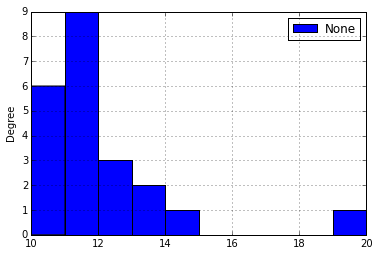

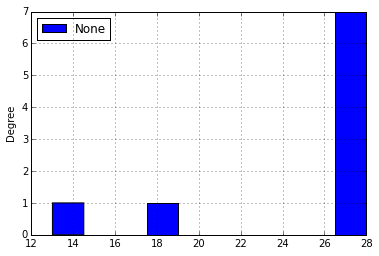

In [239]:
grouped.plot(y='CVP', kind='hist', subplots=True)
